# Week10 Learning from Text Data

- **Student ID** : 201711206
- **Name** : 정호종

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“Week10_\<StudentID\>_\<Name\>.ipynb”**
  - Ex) Week10\_2020123456\_홍길동.ipynb
- Due : **Saturday 11:59pm**

## pip install -U nltk

In [10]:
#pip install -U nltk
#pip install konlpy

---

In [11]:
import nltk
nltk.download('punkt')  
print (nltk.__version__)

3.8.1


[nltk_data] Downloading package punkt to /Users/hsjack/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. Preprocessing texts

### Load the IMDb movie review data 

In [12]:
import pandas as pd

# read movie review data 'movie_data.csv'
df = pd.read_csv('movie_data.csv', encoding='utf-8')
df.head(5)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [13]:
# check the shape of data
df.shape

(50000, 2)

### Preprocessing (cleaning) text 

In [14]:
# cleaning texts using regular expression
import re
def preprocessor(text):
    text = re.sub("<[^>]*>", '', text)  # remove <...> (tags)
    text = re.sub("\W+", ' ', text)     # remove all non-words
    text = re.sub("^\s", '', text)      # remove space in start of the statement
    text = re.sub("\s$", '', text)      # remove space in end of the statement
    text = text.lower()                 # change to lower cases
    return text

preprocessor("</a>This is a $100 TEST!!! ^^")

'this is a 100 test'

In [15]:
# check the review of movie 1 
df.loc[1, 'review']

"OK... so... I really like Kris Kristofferson and his usual easy going delivery of lines in his movies. Age has helped him with his soft spoken low energy style and he will steal a scene effortlessly. But, Disappearance is his misstep. Holy Moly, this was a bad movie! <br /><br />I must give kudos to the cinematography and and the actors, including Kris, for trying their darndest to make sense from this goofy, confusing story! None of it made sense and Kris probably didn't understand it either and he was just going through the motions hoping someone would come up to him and tell him what it was all about! <br /><br />I don't care that everyone on this movie was doing out of love for the project, or some such nonsense... I've seen low budget movies that had a plot for goodness sake! This had none, zilcho, nada, zippo, empty of reason... a complete waste of good talent, scenery and celluloid! <br /><br />I rented this piece of garbage for a buck, and I want my money back! I want my 2 hou

In [16]:
# cleaning the review text of movie 1 
preprocessor(df.loc[1, 'review'])

'ok so i really like kris kristofferson and his usual easy going delivery of lines in his movies age has helped him with his soft spoken low energy style and he will steal a scene effortlessly but disappearance is his misstep holy moly this was a bad movie i must give kudos to the cinematography and and the actors including kris for trying their darndest to make sense from this goofy confusing story none of it made sense and kris probably didn t understand it either and he was just going through the motions hoping someone would come up to him and tell him what it was all about i don t care that everyone on this movie was doing out of love for the project or some such nonsense i ve seen low budget movies that had a plot for goodness sake this had none zilcho nada zippo empty of reason a complete waste of good talent scenery and celluloid i rented this piece of garbage for a buck and i want my money back i want my 2 hours back i invested on this grade f waste of my time don t watch this 

### Tokenizing (English)

In [17]:
text = 'The sun is shining, the weather is sweet, and she likes RUNNING!'
print(text)

# cleaning the text using preprocessor
text_prep = preprocessor(text)
print(text_prep)

The sun is shining, the weather is sweet, and she likes RUNNING!
the sun is shining the weather is sweet and she likes running


In [18]:
from nltk.tokenize import word_tokenize

# tokenizing the preprocessed text. use nltk.word_tokenize()
text_tokens = word_tokenize(text_prep)
print(text_tokens)

['the', 'sun', 'is', 'shining', 'the', 'weather', 'is', 'sweet', 'and', 'she', 'likes', 'running']


### Stemming (English)

In [19]:
from nltk.stem.porter import PorterStemmer

# stemming. use PorterStemmer.stem()
stemmer = PorterStemmer()

# tokenizer_stemmer function perform tokenizing + stemming 
def tokenizer_stemmer(text):
    text_tokens = word_tokenize(text)
    return [stemmer.stem(word) for word in text_tokens]

# tokenizing and stemming the preprocessed text
text_stems = tokenizer_stemmer(text_prep)
print(text_stems)

['the', 'sun', 'is', 'shine', 'the', 'weather', 'is', 'sweet', 'and', 'she', 'like', 'run']


### Stopwords  (English)

In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# stopwords from nltk.corpus.stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hsjack/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# remove_stopwords function - remove words in stop from text
def remove_stopwords(text):
    return [w for w in text if w not in stop]

# removing stopwords from tokenized text
text_stems = remove_stopwords(text_stems)
text_stems

['sun', 'shine', 'weather', 'sweet', 'like', 'run']

### POS tagging (English)

In [22]:
from nltk.tag import pos_tag

# POS tagging the tokenized text
tagged_text = pos_tag(text_tokens)
tagged_text

[('the', 'DT'),
 ('sun', 'NN'),
 ('is', 'VBZ'),
 ('shining', 'VBG'),
 ('the', 'DT'),
 ('weather', 'NN'),
 ('is', 'VBZ'),
 ('sweet', 'JJ'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('likes', 'VBZ'),
 ('running', 'VBG')]

---

### Load the Korean movie review data 

In [23]:
# read Korean movie reviews "kor_movie.csv"
df_kor = pd.read_csv("kor_movie.csv", encoding='utf-8')
df_kor.head(5)

,review,sentiment
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [24]:
# check the shape of data
df_kor.shape

(200000, 2)

In [25]:
# check the review of movie 1 
df_kor.loc[1,'review']

'흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나'

In [26]:
# cleaning review text of movie 1 
preprocessor(df_kor.loc[1,'review'])

'흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나'

### Tokenizing & stemming (Korean)

In [27]:
text = '하늘을 나는 아름다운 꿈을 꾸었습니다!'

# simple split() method is not appropriate
print('<split() method>')
print(text.split())

<split() method>
['하늘을', '나는', '아름다운', '꿈을', '꾸었습니다!']


In [28]:
from konlpy.tag import Okt

# 형태소분석 - Okt
okt = Okt()

# tokenize text using Okt.morph()
print('<Okt word tokenizer>')
print(okt.morphs(text, norm = True, stem = True))

<Okt word tokenizer>
['하늘', '을', '나', '는', '아름답다', '꿈', '을', '꾸다', '!']


In [29]:
from konlpy.tag import Kkma

# 형태소분석 - Kkma
kkma = Kkma()

# tokenize text using Kkma.morph()
print('<Kkma word tokenizer>')
print(kkma.morphs(text))

<Kkma word tokenizer>
['하늘', '을', '날', '는', '아름답', 'ㄴ', '꿈', '을', '꾸', '었', '습니다', '!']


### POS tagging (Korean)

In [30]:
# POS tagging - okt.pos()
tagged_text = okt.pos(text)
tagged_text

[('하늘', 'Noun'),
 ('을', 'Josa'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('아름다운', 'Adjective'),
 ('꿈', 'Noun'),
 ('을', 'Josa'),
 ('꾸었습니다', 'Verb'),
 ('!', 'Punctuation')]

In [31]:
# POS tagging - Kkma.pos()
tagged_text = kkma.pos(text)
tagged_text

[('하늘', 'NNG'),
 ('을', 'JKO'),
 ('날', 'VV'),
 ('는', 'ETD'),
 ('아름답', 'VA'),
 ('ㄴ', 'ETD'),
 ('꿈', 'NNG'),
 ('을', 'JKO'),
 ('꾸', 'VV'),
 ('었', 'EPT'),
 ('습니다', 'EFN'),
 ('!', 'SF')]

### Extracting nouns (Korean)

In [32]:
# extract nouns only - use okt.nouns()
print(text)
okt.nouns(text)

하늘을 나는 아름다운 꿈을 꾸었습니다!


['하늘', '나', '꿈']

In [33]:
# 띄어쓰기 오류인 경우도 가능 - okt.nouns()
text = '아버지가방에들어가신다'
print(text)
okt.nouns(text)

아버지가방에들어가신다


['아버지', '가방']

---

# 2. Vectorization: the bag-of-words model

### Transforming documents into term frequency vectors 
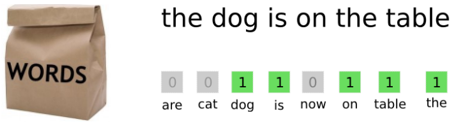

In [34]:
import numpy as np

docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining, the weather is sweet, and she likes RUNNING!'])

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize texts - Document-Term Matrix
count = CountVectorizer()

bag = count.fit_transform(docs)

In [36]:
# vocabulary
print(count.vocabulary_)

{'the': 8, 'sun': 6, 'is': 1, 'shining': 5, 'weather': 9, 'sweet': 7, 'and': 0, 'she': 4, 'likes': 2, 'running': 3}


In [37]:
# Document-Term Matrix
print(bag.toarray())

[[0 1 0 0 0 1 1 0 1 0]
 [0 1 0 0 0 0 0 1 1 1]
 [1 2 1 1 1 1 1 1 2 1]]


### Transforming documents into TF-IDF vectors
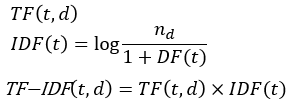    
자주 등장하는 값들은 나와도 큰 의미를 가지지 않도록 값을 줄여주기

In [38]:
np.set_printoptions(precision=2)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize texts - TF-IDF Matrix
tfidf = TfidfVectorizer()

docs_vector = tfidf.fit_transform(docs)

In [40]:
# vocabulary
print(tfidf.vocabulary_)

{'the': 8, 'sun': 6, 'is': 1, 'shining': 5, 'weather': 9, 'sweet': 7, 'and': 0, 'she': 4, 'likes': 2, 'running': 3}


In [41]:
# TF-IDF Matrix (normalized)
print(docs_vector.toarray())

[[0.   0.43 0.   0.   0.   0.56 0.56 0.   0.43 0.  ]
 [0.   0.43 0.   0.   0.   0.   0.   0.56 0.43 0.56]
 [0.33 0.39 0.33 0.33 0.33 0.25 0.25 0.25 0.39 0.25]]


### Preprocessing + stemming + stopword remove + TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize texts - TF-IDF Matrix (with preprocessing, stemming, stopwords)
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor = preprocessor,        # preprocessing
                        tokenizer = tokenizer_stemmer,       # tokenizing + stemming
                        stop_words = stop                   # removing stopwords
                       )
docs_vector = tfidf.fit_transform(docs)

/opt/homebrew/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


In [43]:
# vocabulary
print(tfidf.vocabulary_)

{'sun': 3, 'shine': 2, 'weather': 5, 'sweet': 4, 'like': 0, 'run': 1}


In [44]:
# TF-IDF Matrix (normalized)
print(docs_vector.toarray())

[[0.   0.   0.71 0.71 0.   0.  ]
 [0.   0.   0.   0.   0.71 0.71]
 [0.48 0.48 0.37 0.37 0.37 0.37]]


---

# 3. Document classification
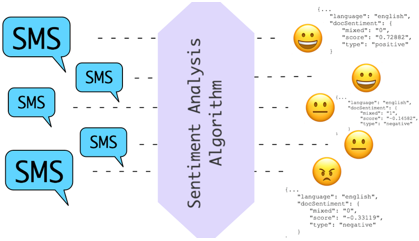

### Load the IMDb movie review data 

In [45]:
import pandas as pd

df = pd.read_csv('movie_data.csv', encoding='utf-8')
df.head(5)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


### Training and test dataset

In [46]:
# use 1000 texts for training and test
X_train = df.loc[0:999, 'review'].values
y_train = df.loc[0:999, 'sentiment'].values
X_test = df.loc[49000:, 'review'].values
y_test = df.loc[49000:, 'sentiment'].values

X_train.shape

(1000,)

In [47]:
# check the review 0 text
X_train[0]

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

### Vectorization

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop.extend(['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv', 'becau'])

# vectorize to TF-IDF Matrix 
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=preprocessor,
                        # Below two steps are needed, but it takes long time,
                        # so, We'll skip this processes
                        tokenizer=tokenizer_stemmer,
                        stop_words=stop,
                        max_df=0.1,       # ignore terms occured in more than 10% of docs (stop words)
                       )

X_train_vector = tfidf.fit_transform(X_train)
X_test_vector = tfidf.fit_transform(X_test)

In [49]:
# automatic stop words
print(tfidf.stop_words_)

{'anoth', 'point', 'turn', 'live', 'two', 'final', 'feel', 'world', 'plot', 'better', 'find', 'seen', 'stori', 'show', 'fan', 'noth', 'cast', 'got', 'real', 'best', 'new', 'good', 'seem', 'complet', 'director', 'quit', 'think', 'still', 'day', 'thought', 'reason', 'ever', 'get', 'way', 'sinc', 'star', 'use', 'expect', 'us', 'action', 'though', 'start', 'big', 'work', 'end', 'role', 'give', 'mani', 'peopl', 'first', 'direct', 'love', 'thing', 'see', 'much', 'around', 'lot', 'happen', 'script', 'perform', 'without', 'recommend', 'one', 'effect', 'help', 'young', 'comedi', 'girl', 'done', 'guy', 'life', 'year', 'scene', 'well', 'lead', 'differ', 'right', 'part', 'might', 'someth', 'sure', 'everi', 'charact', 'make', 'beauti', 'want', 'could', 'line', 'great', 'fact', 'enjoy', 'far', 'movi', 'film', 'like', 'pretti', 'least', 'go', 'come', 'look', 'time', 'call', 'say', 'man', 'hope', 'act', 'howev', 'anyth', 'laugh', 'never', 'need', '10', 'old', 'saw', 'bad', 'play', 'tri', 'realli', 'wo

In [50]:
# vocabulary
print(tfidf.vocabulary_)

{'c': 1758, 'était': 12816, 'complètement': 2441, 'minabl': 7366, 'à': 12815, 'fuir': 4538, 'absolu': 287, 'idiot': 5663, 'attempt': 900, 'destroy': 3118, 'classic': 2231, 'sourc': 10608, 'materi': 7127, 'thoroughli': 11451, 'succeed': 11012, 'circumst': 2205, 'unless': 12010, 'wish': 12585, 'ten': 11341, 'euro': 3915, 'torn': 11589, 'shove': 10224, 'nostril': 7922, 'bunch': 1701, 'vapid': 12156, 'atroci': 895, 'unamus': 11866, 'type': 11827, 'clearli': 2251, 'illustr': 5686, 'gulf': 5048, 'unfortun': 11970, 'divid': 3329, 'audienc': 916, 'individu': 5803, 'heaven': 5273, 'forbid': 4376, 'collect': 2361, 'conceiv': 2457, 'dross': 3493, 'behind': 1202, 'consider': 2519, 'version': 12213, 'current': 2809, 'french': 4489, 'cinema': 2192, 'endur': 3786, 'forc': 4378, 'merci': 7270, 'rewritten': 9498, 'scrap': 9927, 'altogeth': 542, 'vein': 12185, 'adult': 369, 'humour': 5594, 'mine': 7372, 'date': 2910, 'mind': 7367, 'fritz': 4514, 'cat': 1937, 'lack': 6461, 'avant': 954, 'gard': 4638, 'st

In [51]:
# TF-IDF Matrix 
X_train_vector = X_train_vector.toarray()
X_test_vector = X_test_vector.toarray()

X_train_vector.shape

(1000, 13031)

### remove more terms

In [52]:
# vectorize to TF-IDF Matrix - remove rare terms too
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=preprocessor,
                        # Below two steps are needed, but it takes long time,
                        # so, We'll skip this processes
                        tokenizer = tokenizer_stemmer,
                        stop_words = stop,
                        max_df = 0.1,   # ignore terms occured in more than 10% of docs (stop words)
                        min_df = 10     # ignore terms occured in less than 10 docs
                       )

X_train_vector = tfidf.fit_transform(X_train)
X_test_vector = tfidf.transform(X_test)

In [53]:
# TF-IDF Matrix 
X_train_vector = X_train_vector.toarray()
X_test_vector = X_test_vector.toarray()

X_train_vector.shape

(1000, 1670)

In [54]:
# check the review 0 text
print(X_train[0])

In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70's, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich family 

In [55]:
# check the review 0 vector
# 출력시에 데이터가 많으면 ...으로 잘리므로, 생략하지 말라고 만들어준 것
np.set_printoptions(threshold=np.inf)
print(X_train_vector[0])

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.09 0.   0.   0.   0.   0.   0.
 0.08 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.07
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0

### Classification using Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

# train using Logistic Regression. L2 regularization
lr = LogisticRegression(penalty = "l2")
lr.fit(X_train_vector, y_train)
X_train_vector.shape

(1000, 1670)

In [57]:
# train and test accuracy
print(lr.score(X_train_vector, y_train))
print(lr.score(X_test_vector, y_test))

0.95
0.813


In [58]:
# sentiment prediction example 
tweets = ["this movie is garbage", 
          "I loved it very much", 
          "what a fantastic film!"]

# vectorize
tweets_tfidf = tfidf.transform(tweets)

# predict label
y_pred = lr.predict(tweets_tfidf)

for i in range(len(tweets)):
    if y_pred[i] == 0:
        print(tweets[i], "--> Negative")
    else:
        print(tweets[i], "--> Positive")


this movie is garbage --> Negative
I loved it very much --> Positive
what a fantastic film! --> Positive


In [59]:
# sentiment prediction example 
tweets = ["this movie is garbage", 
          "I loved it very much", 
          "what a fantastic film!"]

# vectorize
tweets_tfidf = tfidf.transform(tweets)

# predict label
y_pred = lr.predict(tweets_tfidf)

for i in range(len(tweets)):
    if y_pred[i] == 0:
        print(tweets[i], "--> Negative")
    else:
        print(tweets[i], "--> Positive")


this movie is garbage --> Negative
I loved it very much --> Positive
what a fantastic film! --> Positive


### Classification using Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

# train using Decision Tree. set max dept to 20
tree = DecisionTreeClassifier(max_depth = 20)
tree.fit(X_train_vector, y_train)

DecisionTreeClassifier(max_depth=20)

In [61]:
# train and test accuracy
print(tree.score(X_train_vector, y_train))
print(tree.score(X_test_vector, y_test))

0.911
0.718


In [62]:
# finding most important terms for sentiment analysis of movie review
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(10):
    print("%2d. %-30s %f" % (f+1, 
                             [w for w, n in tfidf.vocabulary_.items() if n == indices[f]],
                             importances[indices[f]]))

 1. ['worst']                      0.105928
 2. ['wast']                       0.084383
 3. ['aw']                         0.060790
 4. ['bore']                       0.051530
 5. ['terribl']                    0.042368
 6. ['script']                     0.034289
 7. ['wors']                       0.026112
 8. ['4']                          0.025439
 9. ['bother']                     0.023631
10. ['instead']                    0.023456


---

# 4. Word Embedding
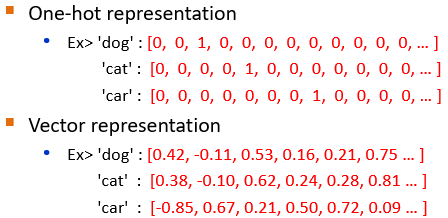  
단어 자체를 벡터로 만들기

### Embedding by training Word2Vec model
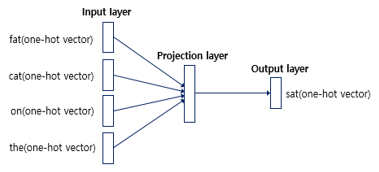

In [63]:
# use the 1000 traing data from IMDb movie review
print(X_train.shape)
print(X_train[0])

(1000,)
In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70's, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich

In [64]:
from nltk.tokenize import word_tokenize

# tokenize the traing data
# sample_text = [word_tokenize(sentence) for sentence in X_train]
sample_text = [word_tokenize(sentence) for sentence in [preprocessor(w) for w in X_train]]

In [65]:
sample_text[0]

['in',
 '1974',
 'the',
 'teenager',
 'martha',
 'moxley',
 'maggie',
 'grace',
 'moves',
 'to',
 'the',
 'high',
 'class',
 'area',
 'of',
 'belle',
 'haven',
 'greenwich',
 'connecticut',
 'on',
 'the',
 'mischief',
 'night',
 'eve',
 'of',
 'halloween',
 'she',
 'was',
 'murdered',
 'in',
 'the',
 'backyard',
 'of',
 'her',
 'house',
 'and',
 'her',
 'murder',
 'remained',
 'unsolved',
 'twenty',
 'two',
 'years',
 'later',
 'the',
 'writer',
 'mark',
 'fuhrman',
 'christopher',
 'meloni',
 'who',
 'is',
 'a',
 'former',
 'la',
 'detective',
 'that',
 'has',
 'fallen',
 'in',
 'disgrace',
 'for',
 'perjury',
 'in',
 'o',
 'j',
 'simpson',
 'trial',
 'and',
 'moved',
 'to',
 'idaho',
 'decides',
 'to',
 'investigate',
 'the',
 'case',
 'with',
 'his',
 'partner',
 'stephen',
 'weeks',
 'andrew',
 'mitchell',
 'with',
 'the',
 'purpose',
 'of',
 'writing',
 'a',
 'book',
 'the',
 'locals',
 'squirm',
 'and',
 'do',
 'not',
 'welcome',
 'them',
 'but',
 'with',
 'the',
 'support',
 'of

In [66]:
from gensim.models import Word2Vec

# train the Word2Vec model with the sample text. set vector_size 10, window 5, min_count 10
model = Word2Vec(sentences = sample_text, 
                 vector_size = 10, 
                 window = 5, 
                 min_count = 10)

In [67]:
# embedded vector of word 'man'
model.wv["man"]

array([ 0.15,  0.07,  1.96,  0.09, -0.04, -0.13,  0.89,  0.73, -1.93,
       -0.13], dtype=float32)

In [68]:
# most similar vector of 'man'
model.wv.most_similar("man")

[('wife', 0.9861035943031311),
 ('life', 0.9748288989067078),
 ('young', 0.9710810780525208),
 ('father', 0.9700731039047241),
 ('law', 0.963341474533081),
 ('family', 0.956261932849884),
 ('woman', 0.9557235240936279),
 ('son', 0.9544103145599365),
 ('students', 0.9515435099601746),
 ('finds', 0.9511572122573853)]

### Pretrained model - GloVe

In [69]:
import gensim.downloader as dw

# load the pretrained model 'glove-wiki-gigaword-100'
model = dw.load('glove-wiki-gigaword-100')

In [70]:
# embedded vector of word 'car'
model['car']

array([-0.17, -0.54,  0.31, -0.53,  0.27, -0.14,  0.37,  0.68,  0.78,
        0.68,  0.69,  0.21,  0.09,  0.25, -0.16,  0.46, -0.15,  0.26,
       -0.12,  0.59,  1.04, -0.21,  0.3 , -0.34,  0.63, -0.32, -1.  ,
       -0.34,  0.25,  0.1 ,  0.02,  0.55, -0.33,  0.3 ,  0.41,  0.42,
        0.26,  0.13,  0.8 ,  0.62,  0.54, -0.59,  0.88, -0.06, -0.29,
        0.62,  0.33,  0.14, -0.04, -1.18, -0.46,  0.16, -0.51,  1.24,
        0.31, -1.96, -1.19,  1.2 ,  2.11,  0.08,  0.54,  0.79,  0.35,
        0.88,  0.54, -0.1 ,  0.08, -0.46, -0.27,  0.12, -0.49, -0.61,
        0.07, -0.58,  0.21,  0.62,  1.44, -0.34, -0.9 , -0.7 ,  0.74,
        0.52, -0.19, -0.2 , -0.22, -0.37, -0.35, -0.86, -0.89, -0.44,
        0.19,  0.17,  0.44, -0.11, -0.51,  0.34, -0.1 ,  0.4 ,  1.73,
       -0.71], dtype=float32)

In [71]:
# most similar vector of 'car
model.most_similar('car')

[('vehicle', 0.8630837798118591),
 ('truck', 0.8597878813743591),
 ('cars', 0.837166965007782),
 ('driver', 0.8185911178588867),
 ('driving', 0.781263530254364),
 ('motorcycle', 0.7553158402442932),
 ('vehicles', 0.7462256550788879),
 ('parked', 0.74594646692276),
 ('bus', 0.7372707724571228),
 ('taxi', 0.7155268788337708)]

In [72]:
# most similar vector of 'dog'
model.most_similar('dog')

[('cat', 0.8798075318336487),
 ('dogs', 0.8344309329986572),
 ('pet', 0.7449564337730408),
 ('puppy', 0.723637580871582),
 ('horse', 0.7109652757644653),
 ('animal', 0.6817063093185425),
 ('pig', 0.655417263507843),
 ('boy', 0.6545307636260986),
 ('cats', 0.6471932530403137),
 ('rabbit', 0.6468630433082581)]

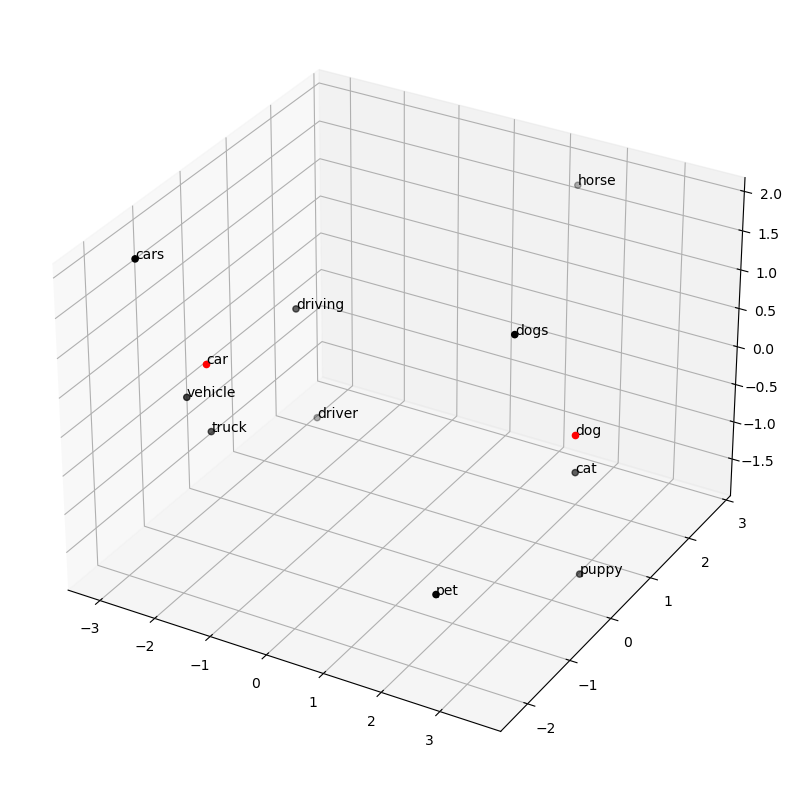

In [73]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

word = "car"
# similar words - X
similar_words1 = [word] + [t[0] for t in model.most_similar(word, topn=5)]
X = model[similar_words1]

word = "dog"
# similar words - Y
similar_words2 = [word] + [t[0] for t in model.most_similar(word, topn=5)]
Y = model[similar_words2]

# pca to reduce dimensionality from 300 to 3
pca = PCA(n_components = 3)
pca.fit(np.vstack((X,Y)))
X = pca.transform(X)
Y = pca.transform(Y)

# plot 3d
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[0,0], X[0,1], X[0,2], c="red")
ax.scatter(X[1:,0], X[1:,1], X[1:,2], c="black")
ax.scatter(Y[0,0], Y[0,1], Y[0,2], c="red")
ax.scatter(Y[1:,0], Y[1:,1], Y[1:,2], c="black")

for row in range(len(X)):
    x, y, z = X[row]
    ax.text(x, y, z, s=similar_words1[row])
    x, y, z = Y[row]
    ax.text(x, y, z, s=similar_words2[row])


---

# Quiz 1 : Naver movie review classification(Korean)
- Use movie review dataset "kor_movie.csv"
- class : 0, 1 (neg, pos)
- data size : 200,000 - use first 1,000 texts
- use 70% as training set
1. Preprocess, tokenize and stemming text using Okt
2. Make TF-IDF vectors - ignore terms occured in more than 10% of texts
3. Build model using Logistic Regression and Decision Tree. Check the accuracies
4. Find most important 20 terms using Decision Tree
5. Predict sentiment of a test text

### Read dataset. Use first 1000 texts only

In [74]:
import pandas as pd
import numpy as np

# read dataset "kor_movie.csv"
df_kor = pd.read_csv("kor_movie.csv", encoding='utf-8')

df_kor

,review,sentiment
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...
199995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
199996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
199997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
199998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [75]:
# use first 10000 reviews 
df_sample = df_kor.iloc[:10000]

# check the number of class 0 and 1
print(np.bincount(df_sample.sentiment))
print(df_sample['review'])

[5021 4979]
0                                     아 더빙.. 진짜 짜증나네요 목소리
1                       흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                       너무재밓었다그래서보는것을추천한다
3                           교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4       사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                              ...                        
9995    곰티비로 무료로 봤기때문에 5점주려고했는데 1 한국 공포영화의 특징인 깜놀시키려 하...
9996    이딴걸드라마라고썼냐 수습할수없으면걍친자녀아니면되고 간단하네 얼굴을바꿨으면 결말이라도...
9997                                왠지 김연아 크면 에리카처럼 될것같음.
9998            솔직히 굿 ㅋㅋㅋㅋ 넘버11씨는 살아남길 바랬는데 2번째극장판 어서 나오길
9999                                        그냥보다나옴 노답 핵노잼
Name: review, Length: 10000, dtype: object


### Get X and y

In [76]:
# get X and y
X = np.array(df_sample['review'])
y = np.array(df_sample.sentiment)

# check the shape of data
X.shape

(10000,)

### Get training and test set

In [77]:
from sklearn.model_selection import train_test_split

# Split Dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

X_train.shape

(7000,)

### Vectorize using Okt

In [1]:
# function for tokenizing + stemming using Okt
from konlpy.tag import Okt

okt = Okt()

# tokenizer_kor function perform tokenizing + stemming using Okt
def tokenizer_kor(text):
    return okt.morphs(text, stem = True, norm = True) 

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize X_train - TF-IDF Matrix (with preprocessing, tokenizing, max_df = 0.1)
tfidf = TfidfVectorizer(preprocessor = preprocessor,
                        tokenizer = tokenizer_kor,
                        max_df = 0.1)

X_train_vector = tfidf.fit_transform(X_train)
X_test_vector = tfidf.transform(X_test)

In [80]:
# TF-IDF Matrix 
X_train_vector = X_train_vector.toarray()
X_test_vector = X_test_vector.toarray()
X_train_vector.shape

(7000, 10530)

In [81]:
# check the review 0 text
print(X_train[0])

진지하고 무거운 소재를 경쾌하고 재미있게 만들었다


In [82]:
# check the review 0 vector
np.set_printoptions(threshold=np.inf)
print(X_train_vector[0])

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0. 

### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression(penalty="l2")
lr = LogisticRegression(penalty = 'l2')
lr.fit(X_train_vector, y_train)

LogisticRegression()

In [84]:
# train and test accuracy of the model. use .score(X, y)
print(f"Training Accuracy : {lr.score(X_train_vector, y_train):.2f}")
print(f"Training Accuracy : {lr.score(X_test_vector, y_test):.2f}")

Training Accuracy : 0.91
Training Accuracy : 0.82


### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

# train using Decision Tree. max depth 30
tree = DecisionTreeClassifier(max_depth = 30)
tree.fit(X_train_vector, y_train)

DecisionTreeClassifier(max_depth=30)

In [86]:
# train and test accuracy of the model
print(f"Training Accuracy : {tree.score(X_train_vector, y_train):.2f}")
print(f"Training Accuracy : {tree.score(X_test_vector, y_test):.2f}")

Training Accuracy : 0.77
Training Accuracy : 0.69


In [87]:
# finding 20 most important terms
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(20):
    print("%2d. %-30s %f" % (f+1, 
                             [w for w, n in tfidf.vocabulary_.items() if n == indices[f]],
                             importances[indices[f]]))

 1. ['재밌다']                        0.092182
 2. ['최고']                         0.066997
 3. ['아깝다']                        0.047025
 4. ['재미없다']                       0.038786
 5. ['재미있다']                       0.037302
 6. ['없다']                         0.033990
 7. ['좋다']                         0.033944
 8. ['감동']                         0.030603
 9. ['쓰레기']                        0.022893
10. ['다시']                         0.018314
11. ['최악']                         0.017594
12. ['가슴']                         0.016516
13. ['아름답다']                       0.013264
14. ['지루하다']                       0.013261
15. ['명작']                         0.013180
16. ['짱']                          0.013175
17. ['꼭']                          0.012587
18. ['멋지다']                        0.012346
19. ['괜찮다']                        0.011770
20. ['뭐']                          0.010610


### Test of Logistic Regression model

In [88]:
test = ["정말 재미있는 영화! 올해 본 영화 중 제일 추천할만함"]

In [89]:
# transform the test text to TF-IDF
test_tfidf = tfidf.transform(test)

# get the prediction and probability
y_pred = lr.predict(test_tfidf)
y_prob = lr.predict_proba(test_tfidf)

print('Text :', test[0])
if y_pred == 0:
    print('Prediction : Negative review')
    print('Probability : %.2f' % y_prob[0, 0])
if y_pred[0] == 1:
    print('Prediction : Positive review')
    print('Probability : %.2f' % y_prob[0, 1])

Text : 정말 재미있는 영화! 올해 본 영화 중 제일 추천할만함
Prediction : Positive review
Probability : 0.95


---

# Quiz 2 : Finding Similar Texts using Cosine Similarity
- Use movie metadata dataset "movies_metadata.csv"
- data size : 45,466
- use 'title' and 'overview'

1. Make TF-IDF vectors of 'overview' texts
2. Make cosine similarity matrix
3. Write 'find_similar_movies' function
   - input : (title, cosine similarity matrix)
   - output : 10 movie titles with most similar overview text
4. Find out 10 most similar movies to 'The Godfather', and 'The Dark Knight Rises'

In [90]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# read dataset 'movies_metadata.csv'
data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [91]:
# check the data shape
data.shape

(45466, 24)

In [92]:
# check the title and overview of movie 0
print(data.loc[0, 'title'])
print(data.loc[0, 'overview'])

Toy Story
Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.


In [93]:
# remove NaN in overview
data['overview'] = data['overview'].fillna('')

In [94]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hsjack/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorize to TF-IDF Matrix - remove stop words in 'english'
stops = stopwords.words('english')
tfidf = TfidfVectorizer(stop_words = stops)

overview_vector = tfidf.fit_transform(data['overview'])
overview_vector.shape

(45466, 75990)

In [96]:
from sklearn.metrics.pairwise import cosine_similarity

# compute cosine similarity matrix
cosine_sim = cosine_similarity(overview_vector, overview_vector)
cosine_sim.shape

(45466, 45466)

In [97]:
#check the values of cosine similarity matrix for first 10 rows and 10 columns
print(cosine_sim[0:10, 0:10])

[[1.   0.01 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 1.   0.05 0.01 0.   0.05 0.   0.   0.1  0.  ]
 [0.   0.05 1.   0.02 0.02 0.   0.   0.01 0.   0.  ]
 [0.   0.01 0.02 1.   0.   0.01 0.   0.01 0.   0.  ]
 [0.   0.   0.02 0.   1.   0.   0.03 0.   0.03 0.  ]
 [0.   0.05 0.   0.01 0.   1.   0.   0.   0.04 0.  ]
 [0.   0.   0.   0.   0.03 0.   1.   0.   0.   0.  ]
 [0.   0.   0.01 0.01 0.   0.   0.   1.   0.   0.  ]
 [0.   0.1  0.   0.   0.03 0.04 0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


In [98]:
# prepare title_to_index matrix
title_to_index = dict(zip(data['title'], data.index))
idx = title_to_index['The Godfather']
idx

834

In [104]:
import numpy as np
'''
find_similar_movies function
   - input : (title, cosine similarity matrix)
   - output : 10 movie titles with most similar overview text
'''
def find_similar_movies(title, cosine_sim=cosine_sim):

   idx = title_to_index[title]
   
#  get the similarity between the given movie and all other movies
#  sim_scores = [[x, y] for x, y in zip(data['title'], cosine_sim[idx])]
   sim_scores = [[index, value] for index, value in enumerate(cosine_sim)]


   # Sort the result and select 10 movies with highest similarity
   sim_scores = sorted(sim_scores, key=lambda x : -x[1])
   print(sim_scores)
   movie_indices = data[sim_scores[0, 1:11], 'title']

   # return the titles
   return movie_indices

In [105]:
# find out 10 most similar movies 
find_similar_movies('The Godfather')

hello


KeyboardInterrupt: 

In [ ]:
# find out 10 most similar movies 
find_similar_movies('The Dark Knight Rises')

In [ ]:
# check the overview text
data.loc[834, 'overview']

In [ ]:
# check the overview text
data.loc[1178, 'overview']